<a href="https://colab.research.google.com/github/AnanyaTayalSC/Drafts/blob/main/Correct%2Cepoch%3D25%2CLR%3D0.001%2C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
from tensorflow.keras import layers, models
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam


from google.colab import drive
drive.mount('/content/drive')

# -----------------------------
# 1) Load CSV
# -----------------------------
csv_file_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/AI_FCW1.csv'
df = pd.read_csv(csv_file_path, header=None)

# Convert to float and handle NaNs
X = df.values.astype(np.float32)
X = np.nan_to_num(X, nan=0.0)  # replace NaNs with 0

# -----------------------------
# 2) Pad sequences if needed
# -----------------------------
# Here, we assume all sequences are already equal length in CSV.
# If not, you can use pad_sequences from keras.preprocessing.sequence

X = np.expand_dims(X, axis=-1)   # shape (n_scenarios, timesteps, 1)

# -----------------------------
# 3) LSTM Autoencoder
# -----------------------------
n_scenarios, timesteps, n_features = X.shape
latent_dim = 64

inputs = layers.Input(shape=(timesteps, n_features))
x = layers.Masking(mask_value=0)(inputs)           # mask padded zeros
x = layers.LSTM(128, return_sequences=True)(x)       # first LSTM
encoded = layers.LSTM(latent_dim)(x)                 # second LSTM (embedding)

x = layers.RepeatVector(timesteps)(encoded)
x = layers.LSTM(128, return_sequences=True)(x)
outputs = layers.TimeDistributed(layers.Dense(n_features))(x)

autoencoder = models.Model(inputs, outputs)
encoder = models.Model(inputs, encoded)

optimizer = Adam(learning_rate=0.0001)
autoencoder.compile(optimizer=optimizer, loss='mse')
#autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X, X, epochs=25, batch_size=32, verbose=1)

# -----------------------------
# 4) Extract embeddings
# -----------------------------
embeddings = encoder.predict(X)

# Optional: scale embeddings before clustering
embeddings_scaled = StandardScaler().fit_transform(embeddings)

# -----------------------------
# 5) Cluster embeddings
# -----------------------------
kmeans = KMeans(n_clusters=9, random_state=0).fit(embeddings_scaled)
labels = kmeans.labels_

print("Embeddings shape:", embeddings.shape)
print("Cluster counts:", pd.Series(labels).value_counts())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/25
436/436 ━━━━━━━━━━━━━━━━━━━━ 61s 98ms/step - loss: 9.7268
Epoch 2/25
436/436 ━━━━━━━━━━━━━━━━━━━━ 42s 97ms/step - loss: 5.9289
Epoch 3/25
436/436 ━━━━━━━━━━━━━━━━━━━━ 43s 98ms/step - loss: 3.9413
Epoch 4/25
436/436 ━━━━━━━━━━━━━━━━━━━━ 43s 98ms/step - loss: 3.0472
Epoch 5/25
436/436 ━━━━━━━━━━━━━━━━━━━━ 43s 98ms/step - loss: 2.5814
Epoch 6/25
436/436 ━━━━━━━━━━━━━━━━━━━━ 81s 97ms/step - loss: 2.3830
Epoch 7/25
436/436 ━━━━━━━━━━━━━━━━━━━━ 42s 97ms/step - loss: 1.9787
Epoch 8/25
436/436 ━━━━━━━━━━━━━━━━━━━━ 43s 98ms/step - loss: 1.8146
Epoch 9/25
436/436 ━━━━━━━━━━━━━━━━━━━━ 81s 96ms/step - loss: 1.6260
Epoch 10/25
436/436 ━━━━━━━━━━━━━━━━━━━━ 42s 97ms/step - loss: 1.4087
Epoch 11/25
436/436 ━━━━━━━━━━━━━━━━━━━━ 42s 97ms/step - loss: 1.6764
Epoch 12/25
436/436 ━━━━━━━━━━━━━━━━━━━━ 42s 97ms/step - loss: 1.3096
Epoch 13/25
436/436 ━━━━━━━━━━━━━━━━━━━━

In [13]:
np.set_printoptions(threshold=np.inf)  # disable truncation
print(labels)

[6 0 5 5 6 0 5 5 6 0 5 5 6 0 5 5 6 0 5 5 6 0 5 5 6 0 5 5 6 0 5 2 6 0 5 2 6
 0 2 2 6 0 2 2 6 0 5 5 6 0 5 5 6 0 5 5 6 0 5 5 6 0 5 5 6 0 5 5 6 0 5 5 6 0
 5 5 6 0 2 2 6 0 2 2 6 0 2 2 6 0 8 5 6 0 8 5 6 0 8 5 6 0 8 5 6 0 8 5 6 0 8
 5 6 0 8 5 6 0 5 2 6 0 5 5 6 0 2 5 6 0 2 2 6 0 8 8 6 0 8 8 6 0 8 8 6 0 8 8
 6 0 8 8 6 0 8 8 6 0 8 8 6 0 8 5 6 0 8 2 6 0 5 2 6 0 2 2 6 0 8 8 6 0 8 8 6
 0 8 8 6 0 8 8 6 0 8 8 6 0 8 8 6 0 8 8 6 0 8 8 6 0 8 5 6 0 8 2 6 0 5 2 6 0
 8 8 6 0 8 8 6 0 8 8 6 0 8 8 6 0 8 8 6 0 8 8 6 0 8 8 6 0 8 8 6 0 8 8 6 0 8
 8 6 0 8 2 6 0 3 8 6 0 3 8 6 0 3 8 6 0 3 8 6 0 3 8 6 0 3 8 6 0 8 8 6 0 8 8
 6 0 8 8 6 0 8 8 6 0 8 8 6 0 3 8 6 0 3 8 6 0 3 8 6 0 3 8 6 0 3 8 6 0 3 8 6
 0 3 8 6 0 8 8 6 0 8 8 6 0 8 8 6 0 8 8 6 0 3 8 6 0 3 8 6 0 3 8 6 0 3 8 6 0
 3 8 6 0 3 8 6 0 3 8 6 0 3 8 6 0 8 8 6 0 8 8 6 0 8 8 6 0 3 8 6 0 3 8 6 0 3
 8 6 0 3 8 6 0 3 8 6 0 3 8 6 0 3 8 6 0 3 8 6 0 3 8 6 0 3 8 6 0 8 8 6 0 3 8
 6 0 3 8 6 0 3 8 6 0 3 8 6 0 3 8 6 0 3 8 6 0 3 1 6 0 3 8 6 0 3 8 6 0 3 8 6
 0 3 8 6 0 8 5 6 0 8 5 6 

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


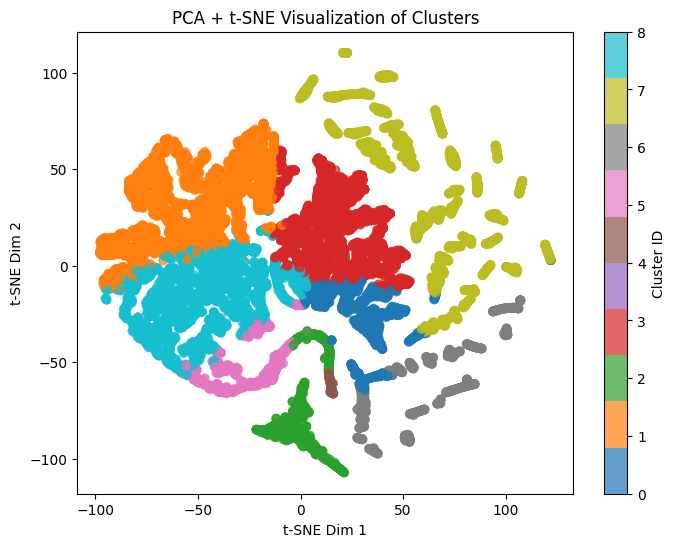

In [11]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Step 1: Reduce dimensionality with PCA first (e.g., 64D → 20D)
pca = PCA(n_components=20, random_state=0)
embeddings_pca = pca.fit_transform(embeddings)

# Step 2: Apply t-SNE on PCA-reduced embeddings
tsne = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=1000)
embeddings_2d = tsne.fit_transform(embeddings_pca)

# Step 3: Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    embeddings_2d[:, 0],
    embeddings_2d[:, 1],
    c=labels,   # cluster/class labels
    cmap="tab10",
    alpha=0.7
)
plt.title("PCA + t-SNE Visualization of Clusters")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.colorbar(scatter, label="Cluster ID")
plt.show()

In [12]:
from sklearn.metrics import silhouette_score
scores = {}
for k in range(2,16):
    km = KMeans(n_clusters=k, random_state=0).fit(embeddings_scaled)
    scores[k] = silhouette_score(embeddings_scaled, km.labels_)
print(scores)


{2: np.float32(0.41820338), 3: np.float32(0.4710016), 4: np.float32(0.45057762), 5: np.float32(0.3636093), 6: np.float32(0.36147377), 7: np.float32(0.3757575), 8: np.float32(0.37204728), 9: np.float32(0.3735219), 10: np.float32(0.369967), 11: np.float32(0.37131444), 12: np.float32(0.36740524), 13: np.float32(0.36781356), 14: np.float32(0.37107965), 15: np.float32(0.37008697)}
